In [281]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import ast
import random as rn
import numpy as np
import math

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.metrics import r2_score

In [283]:
baza = pd.read_csv('taxi 400k.csv')

In [284]:
pd.set_option('display.max_colwidth', 95)
baza.head(4)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8...."


In [285]:
#usuwanie kolumn
baza.drop([ 'ORIGIN_CALL','ORIGIN_STAND','TAXI_ID'], axis=1, inplace=True)

In [286]:
len(baza)

400000

In [287]:
def usun_wiersze_z_brakami(baza):
    baza.drop(baza[baza['MISSING_DATA'] == True].index, inplace=True)
    baza.reset_index(drop=True, inplace=True)

usun_wiersze_z_brakami(baza)  #usuwam wszystkie wiersze gdzie missing data jest true
baza.drop(['MISSING_DATA'], axis=1, inplace=True)

In [288]:
len(baza)

399997

In [289]:
baza.sort_values('TIMESTAMP',inplace = True)

In [290]:
#zamiana timestampa na bardzije przyjazny zapis
baza['year'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).year) 
baza['month'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).month) 
baza['month_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).day) 
#baza['hour'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).hour)
baza['hour'] = baza['TIMESTAMP'].apply(lambda x: datetime.datetime.fromtimestamp(x).hour + (0.5 if datetime.datetime.fromtimestamp(x).minute > 30 else 0))
baza['week_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).weekday()) 

In [291]:
baza.head() #pierwsze 5 rekordów 


,TRIP_ID,CALL_TYPE,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,C,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.6...",2013,7,1,2.0,0
3,1372636854620000520,C,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8....",2013,7,1,2.0,0
0,1372636858620000589,C,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8...",2013,7,1,2.0,0
10,1372636875620000233,C,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.6...",2013,7,1,2.0,0
64,1372636896620000360,C,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8....",2013,7,1,2.0,0


In [292]:
puste_wiersze = baza[baza['POLYLINE'].isnull()]

# Wyświetl wybrane wiersze
print(puste_wiersze)

Empty DataFrame
Columns: [TRIP_ID, CALL_TYPE, TIMESTAMP, DAY_TYPE, POLYLINE, year, month, month_day, hour, week_day]
Index: []


Text(0, 0.5, 'Dzień')

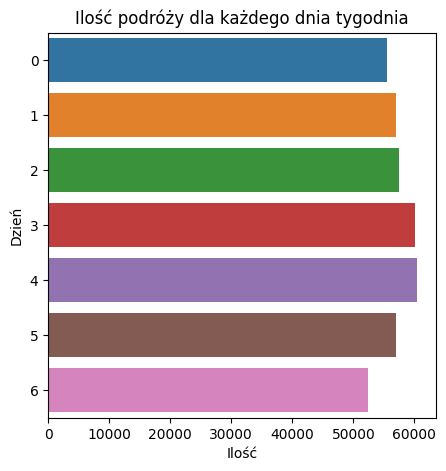

In [293]:
plt.figure(figsize = (5,5))
plt.title('Ilość podróży dla każdego dnia tygodnia')
sns.countplot(y = 'week_day', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Dzień')

Text(0, 0.5, 'Miesiąc')

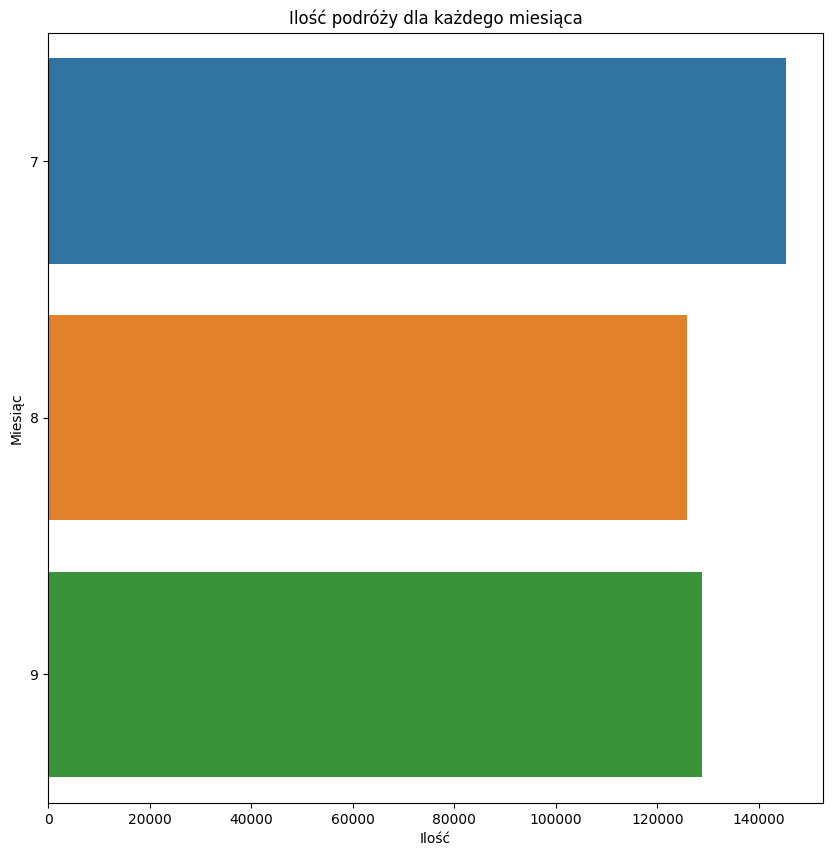

In [294]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdego miesiąca')
sns.countplot(y = 'month', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Miesiąc')

Text(0, 0.5, 'Godzina')

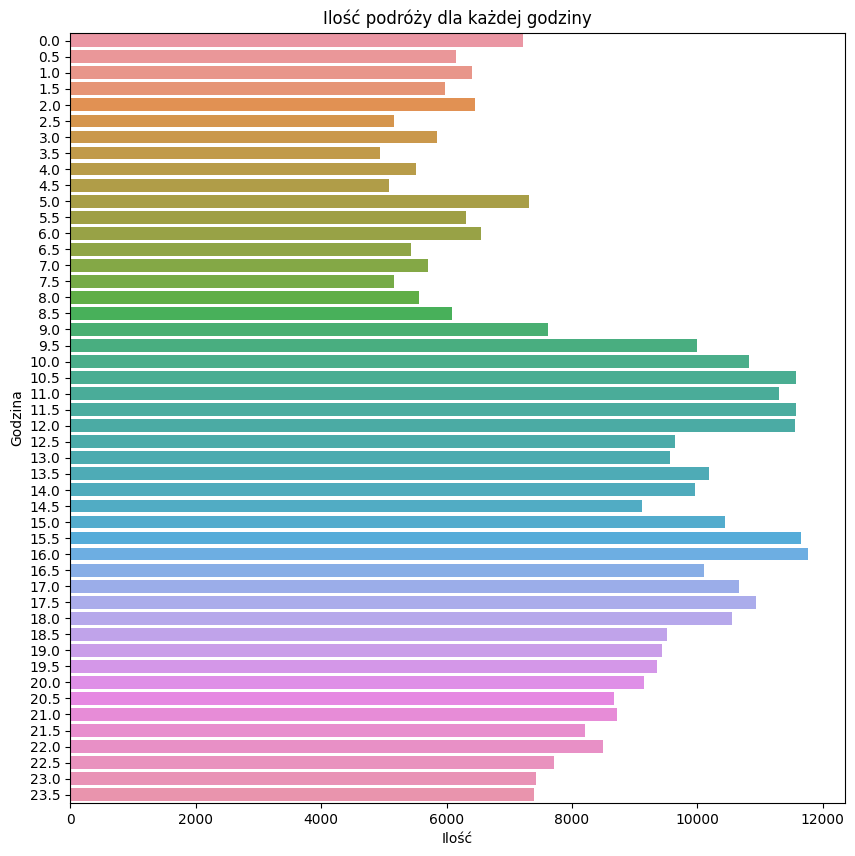

In [295]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdej godziny')
sns.countplot(y = 'hour', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Godzina')

In [296]:
baza = baza.drop_duplicates()

In [297]:
data = baza[['POLYLINE', 'hour']].copy()
data = data[:50000]
data.head()

,POLYLINE,hour
577,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.6...",2.0
3,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8....",2.0
0,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8...",2.0
10,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.6...",2.0
64,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8....",2.0


In [298]:
data['POLYLINE'] = data['POLYLINE'].apply(lambda x: ast.literal_eval(x)) #tutaj zamieniam polyline ze stringa na tablice
data['FIRST_ELEMENT'] = data['POLYLINE'].apply(lambda x: x[0] if len(x) > 0 else None) # wybieram pierwszy element
data['LAST_ELEMENT'] = data['POLYLINE'].apply(lambda x: x[-1] if len(x) > 0 else None) # wybieram ostatni element
data['TIME_IN_SEC'] = data['POLYLINE'].apply(lambda x: len(x)*15)
data = data.drop('POLYLINE', axis=1)

In [299]:
puste_wiersze = data[data['FIRST_ELEMENT'].isnull() | data['LAST_ELEMENT'].isnull()]
print(len(puste_wiersze))

201


In [300]:
data = data.dropna()
puste_wiersze = data[data['FIRST_ELEMENT'].isnull() | data['LAST_ELEMENT'].isnull()]
print(puste_wiersze)

Empty DataFrame
Columns: [hour, FIRST_ELEMENT, LAST_ELEMENT, TIME_IN_SEC]
Index: []


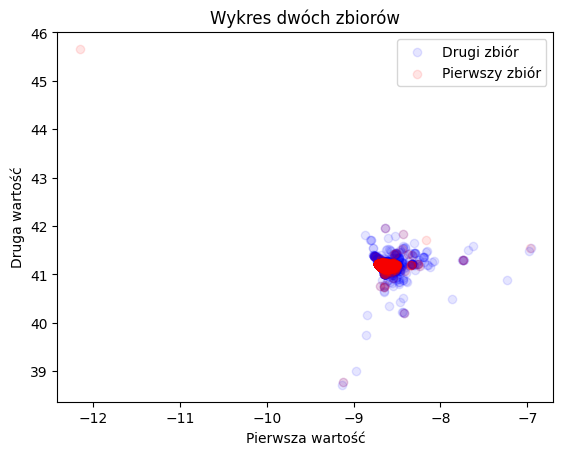

In [301]:
x = data['FIRST_ELEMENT'].apply(lambda x: x[0])
y = data['FIRST_ELEMENT'].apply(lambda x: x[1])

x2 = data['LAST_ELEMENT'].apply(lambda x: x[0])
y2 = data['LAST_ELEMENT'].apply(lambda x: x[1])

# Tworzenie wykresu
plt.scatter(x2, y2, c='blue',alpha=0.1, label='Drugi zbiór')
plt.scatter(x, y, c='red',alpha=0.1, label='Pierwszy zbiór')

plt.xlabel('Pierwsza wartość')
plt.ylabel('Druga wartość')
plt.title('Wykres dwóch zbiorów')
plt.legend()
plt.show()

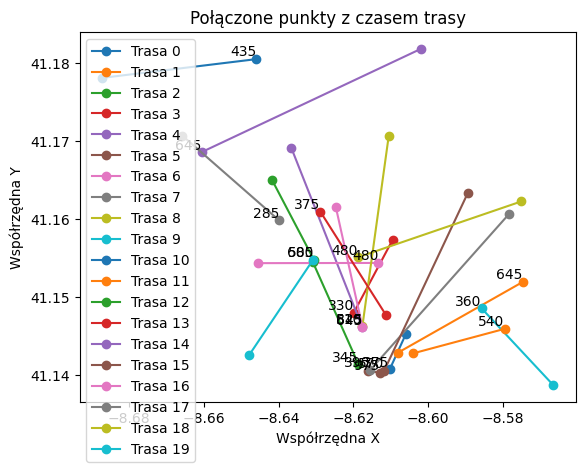

In [302]:
first_element_list = data['FIRST_ELEMENT'].tolist()
last_element_list = data['LAST_ELEMENT'].tolist()
time_in_sec_list = data['TIME_IN_SEC'].tolist()

# Rysowanie wykresu
plt.figure()
for i in range(20):
    first_element = first_element_list[i]
    last_element = last_element_list[i]
    time_in_sec = time_in_sec_list[i]
    plt.plot([first_element[0], last_element[0]], [first_element[1], last_element[1]], '-o', label='Trasa {}'.format(i))
    plt.text(first_element[0], first_element[1], str(time_in_sec), ha='right', va='bottom')
    #plt.text(last_element[0], last_element[1], str(time_in_sec), ha='right', va='bottom')

plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Połączone punkty z czasem trasy')
plt.legend()
plt.show()

In [303]:
#liczenie dlugosci wektora

In [304]:
data['VECTOR_LENGTH'] = data.apply(lambda row: np.linalg.norm(np.array(row['LAST_ELEMENT']) - np.array(row['FIRST_ELEMENT'])), axis=1)

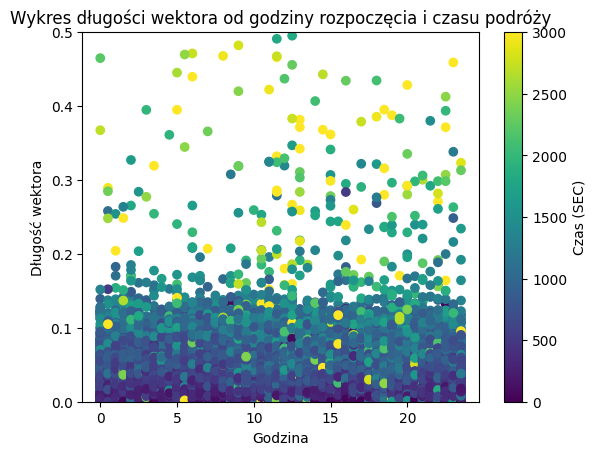

In [332]:
plt.scatter(data['hour'], data['VECTOR_LENGTH'], c=data['TIME_IN_SEC'], cmap='viridis')
plt.xlabel('Godzina')
plt.ylabel('Długość wektora')
plt.title('Wykres długości wektora od godziny rozpoczęcia i czasu podróży')
plt.colorbar(label='Czas (SEC)')
#plt.xlim(0,1000)
plt.ylim(0,0.5)
plt.clim(0,3000)
plt.show()

In [306]:
#KNN

In [307]:
# zbior z zaograglanym pierwszym elementm i odjetymi wartosciami
data = data.copy()
data['FIRST_ELEMENT'] = data['FIRST_ELEMENT'].apply(lambda x: round(x[1] - x[0], 1))
data.head(5)


,hour,FIRST_ELEMENT,LAST_ELEMENT,TIME_IN_SEC,VECTOR_LENGTH
577,2.0,49.8,"[-8.60589, 41.145345]",375,0.006366
3,2.0,49.7,"[-8.607996, 41.142915]",645,0.034522
0,2.0,49.8,"[-8.630838, 41.154489]",345,0.017881
10,2.0,49.8,"[-8.60949, 41.157351]",330,0.013983
64,2.0,49.8,"[-8.636625, 41.169141]",645,0.029853


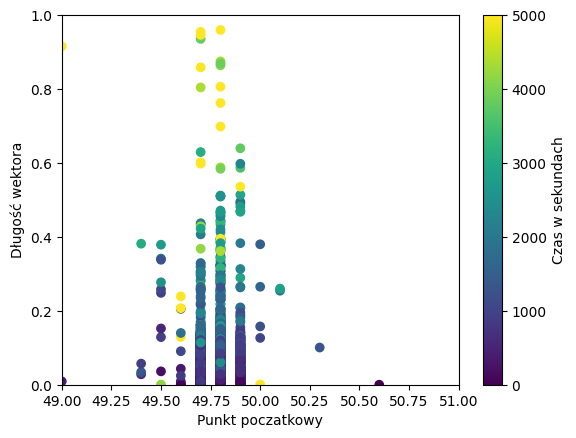

In [308]:
plt.scatter(data['FIRST_ELEMENT'], data['VECTOR_LENGTH'],  c=data['TIME_IN_SEC'], cmap='viridis')
plt.xlabel('Punkt poczatkowy')
plt.ylabel('Długość wektora')
plt.colorbar(label='Czas w sekundach')
#plt.xlim(0,1000)
plt.clim(0,5000)
plt.xlim(49,51)
plt.ylim(0,1)
plt.show()

Tutaj KNN

In [309]:
class DataProcessing:
    @staticmethod
    def shuffle (x):
        for i in range(len(x)-1, 0,-1):
            j = rn.randint(0,i-1)
            x.iloc[i],x.iloc[j]=x.iloc[j],x.iloc[i]
    @staticmethod
    def normalization (x):
        values = x.select_dtypes(exclude="object") #usunie string bo string to obiekty zawsze
        columnNames=values.columns.tolist()
        for column in columnNames:
            data = x.loc[:,column] # wyciagamy cala kolumne wartosc
            min1 = min(data)
            max1 = max(data)
            for row in range(len(x)):
                xprim = (x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim
    @staticmethod
    def split (x, k): # k = 0.7, czyli 70% treningowe reszta sprawdzajace, i zwraca dwa zbiory, trenujacy i walidujacy
        return x[: int(len(x)*k)], x[int(len(x)*k):]

In [310]:
class knn:
    @staticmethod
    def odleglosc(training,probka):
        odleglosc = 0
        odleglosclist = []
        for i in range(len(training)):
            odleglosc = 0
            for j in (0,4):
                odleglosc += pow(training.iloc[i,j]- probka.iloc[j],2)
            odleglosclist.insert(i,math.sqrt(odleglosc))      
        #training["odleglosc"] = odleglosclist
        training.loc[:, "odleglosc"] = odleglosclist
        return training.sort_values("odleglosc")
    def sprawdzenie(training, k):  
        d = 0
        for i in range (k):
           d += training.iloc[i,3]
        return int(d/k)
    def dokladnosc (trainingSet, validitingSet, zakres):
        zgadza_sie = 0
        for i in range (zakres):
            trainingSetdwa = knn.odleglosc(trainingSet, validitingSet.iloc[i])
            wynik = knn.sprawdzenie(trainingSetdwa,5)  
            #print (i,"wynik: ", wynik , "prawidlowa wartosc", validitingSet.iloc[i,3])
            if(validitingSet.iloc[i,3]-wynik <15 & validitingSet.iloc[i,3]-wynik >-15 ):
                zgadza_sie+=1
        print("Procent: ", (zgadza_sie/zakres) *100)

In [311]:
# działa ok ale numpy jest 1000 razy szybszy
#DataProcessing.shuffle(data)
#trainingSet, validitingSet = DataProcessing.split(data, 0.7)
#print("Długosc treningowego", len(trainingSet))
#print(50*"-")
#print("Długosc walidacyjnego", len(validitingSet))

In [312]:
np.random.shuffle(data.values)
trainingSet, validitingSet = DataProcessing.split(data, 0.7)
print("Długosc treningowego", len(trainingSet))
print(50*"-")
print("Długosc walidacyjnego", len(validitingSet))

Długosc treningowego 34859
--------------------------------------------------
Długosc walidacyjnego 14940


In [313]:
#knn.dokladnosc(trainingSet, validitingSet, 100)

In [314]:
np.random.shuffle(data.values)
data.iloc[1,3]

645

In [315]:
#wprowadz długsc trasy w kilometrach, pełną godzinę rozpoczecia, zbiór, oraz dla jakiej ilosc podobnych elementem chcesz oszacowac czas
def oszacujczas(length, time, dataset, n):
    odleglosclist = []
    czas =0
    for i in range (0,1000): # sprawdzamy sasiadowlen(dataset)
        odleglosc = 0
        odleglosc += pow(dataset.iloc[i,0]- time,2)
        odleglosc += pow(dataset.iloc[i,4]- length,2)
        odleglosclist.insert(i,math.sqrt(odleglosc))
    dataset = dataset.iloc[0:1000]  
    dataset.loc[:, "odleglosc"] = odleglosclist
    dataset.sort_values("odleglosc")
    for i in range(0,n):
        czas += dataset.iloc[n,3]
    return czas/(n*60)

In [316]:
print("Oszacowany czas dla podróży 5km o godzienie 15.00: ", oszacujczas(5,15,data,5))

Oszacowany czas dla podróży 5km o godzienie 15.00:  16.25


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8928\1360925398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, "odleglosc"] = odleglosclist


Drzewo Decyzyjne

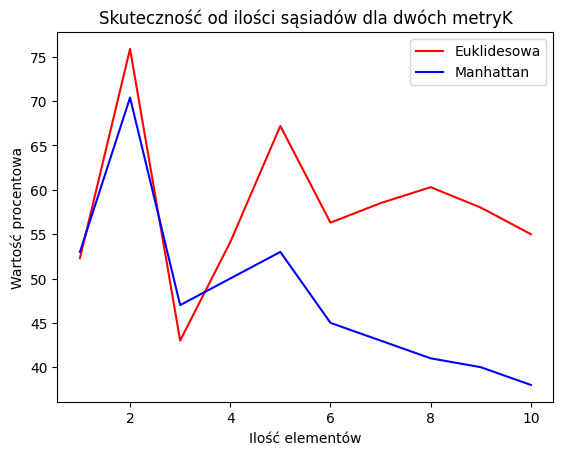

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane
ilosc_elementow = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
czerwony = [52.3, 75.89, 43, 54.1, 67.2, 56.3, 58.5, 60.3,58.0,55]
niebieski = [53, 70.4, 47, 50, 53, 45, 43, 41,40,38]

# Tworzenie DataFrame
df = pd.DataFrame({'Ilość elementów': ilosc_elementow, 'Czerwony (%)': czerwony, 'Niebieski (%)': niebieski})

# Wykres
plt.plot(df['Ilość elementów'], df['Czerwony (%)'], 'r', label='Euklidesowa')
plt.plot(df['Ilość elementów'], df['Niebieski (%)'], 'b', label='Manhattan')
plt.xlabel('Ilość elementów')
plt.ylabel('Wartość procentowa')
plt.title('Skuteczność od ilości sąsiadów dla dwóch metryK')
plt.legend()
plt.show()

In [317]:
df = baza.iloc[:50000]
df.head()

,TRIP_ID,CALL_TYPE,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,C,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.6...",2013,7,1,2.0,0
3,1372636854620000520,C,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8....",2013,7,1,2.0,0
0,1372636858620000589,C,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8...",2013,7,1,2.0,0
10,1372636875620000233,C,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.6...",2013,7,1,2.0,0
64,1372636896620000360,C,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8....",2013,7,1,2.0,0


In [318]:
df.shape

(50000, 10)

In [319]:
df['Polyline Length'] = df['POLYLINE'].apply(lambda x : len(eval(x))-1)
df['Trip Time(sec)'] = df['Polyline Length'].apply(lambda x : x * 15)
df = pd.get_dummies(df, columns=['CALL_TYPE'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8928\3039422074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polyline Length'] = df['POLYLINE'].apply(lambda x : len(eval(x))-1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8928\3039422074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trip Time(sec)'] = df['Polyline Length'].apply(lambda x : x * 15)


In [320]:
df.head()

,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day,Polyline Length,Trip Time(sec),CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
577,1372636853620000380,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.6...",2013,7,1,2.0,0,24,360,0,0,1
3,1372636854620000520,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8....",2013,7,1,2.0,0,42,630,0,0,1
0,1372636858620000589,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8...",2013,7,1,2.0,0,22,330,0,0,1
10,1372636875620000233,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.6...",2013,7,1,2.0,0,21,315,0,0,1
64,1372636896620000360,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8....",2013,7,1,2.0,0,42,630,0,0,1


In [321]:

X = df[['Polyline Length', 'CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C']]
y = df['Trip Time(sec)']

In [322]:
s = StandardScaler()
X = s.fit_transform(X)

In [323]:
print(np.mean(X))
np.std(X)

-2.4158453015843408e-18


0.9999999999999998

In [324]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3)

In [325]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (35000, 4)
The size of training output is (35000,)
**************************************************
The size of testing input is (15000, 4)
The size of testing output is (15000,)


In [326]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [327]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=26)


{'max_depth': 26}

In [328]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [329]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.0
R-squared:  1.0


In [330]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  97.42166083577101
R-squared:  0.9832170150188205
